In [1]:
# import necesstray modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data\Train.csv") # read the data

# Exploratory Data Analysis (EDA)

### Step 1: Let' s take a look at the data

In [3]:
df.sample(5)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
4651,8659,deep neural networks (dnns) have been widely a...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2142,15050,"magnetic properties of amoopo$_4$cl (a = k, rb...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10155,675,pairwise ranking methods are a basis of many w...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4889,13622,recent years have seen the flurry of activitie...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3288,4720,word embedding models offer continuous vector ...,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 2: Unique Values

In [4]:
df.nunique()

id                                              14004
ABSTRACT                                        14004
Computer Science                                    2
Mathematics                                         2
Physics                                             2
Statistics                                          2
Analysis of PDEs                                    2
Applications                                        2
Artificial Intelligence                             2
Astrophysics of Galaxies                            2
Computation and Language                            2
Computer Vision and Pattern Recognition             2
Cosmology and Nongalactic Astrophysics              2
Data Structures and Algorithms                      2
Differential Geometry                               2
Earth and Planetary Astrophysics                    2
Fluid Dynamics                                      2
Information Theory                                  2
Instrumentation and Methods 

### Step 3: Check for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

### conclusion drawn:

##### - as you can see there aren't any colums with null values in it.
#### - also, all the other columns are basically binary classification (0 & 1) so it's not necessary to have them as 'int64'. we can convert it to 'int32' to save up space.

### Step 4: Check for duplicates

In [6]:
df.duplicated().sum()

0

### Step 5: Seperate Independent and target variable

In [7]:
X = df['ABSTRACT']
y = df.drop(['id', 'ABSTRACT'], axis=1)

In [8]:
y

,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14000,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14001,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Step 6: Convert 'int64' to 'int32'

In [9]:
# convert all the columns from 'int64' to 'int32'. This is done because on inspection all the columns were having
# values 0 & 1 so this save up space
y = y.astype('int32')

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Computer Science                              14004 non-null  int32
 1   Mathematics                                   14004 non-null  int32
 2   Physics                                       14004 non-null  int32
 3   Statistics                                    14004 non-null  int32
 4   Analysis of PDEs                              14004 non-null  int32
 5   Applications                                  14004 non-null  int32
 6   Artificial Intelligence                       14004 non-null  int32
 7   Astrophysics of Galaxies                      14004 non-null  int32
 8   Computation and Language                      14004 non-null  int32
 9   Computer Vision and Pattern Recognition       14004 non-null  int32
 10  Cosmology 

#### now all 'int64' cols are converted to 'int32' 

#### no duplicates found!

### Step 7: Data distribution Analysis

In [11]:
y.sum()

Computer Science                                5884
Mathematics                                     2831
Physics                                         3856
Statistics                                      3794
Analysis of PDEs                                 607
Applications                                     592
Artificial Intelligence                         1376
Astrophysics of Galaxies                         574
Computation and Language                         645
Computer Vision and Pattern Recognition          939
Cosmology and Nongalactic Astrophysics           633
Data Structures and Algorithms                   496
Differential Geometry                            555
Earth and Planetary Astrophysics                 504
Fluid Dynamics                                   364
Information Theory                               353
Instrumentation and Methods for Astrophysics     490
Machine Learning                                3825
Materials Science                             

#### Convert the tags and count to dictionary

In [12]:
tags_count = y.sum()
tags_count_dict = tags_count.to_dict() # convert to dictionary

#### Get all the columns names

In [13]:
TARGET_COLS = y.columns 

#### Total  Column Tags

In [14]:
len(TARGET_COLS) 

29

### Bar Chart (Classes)

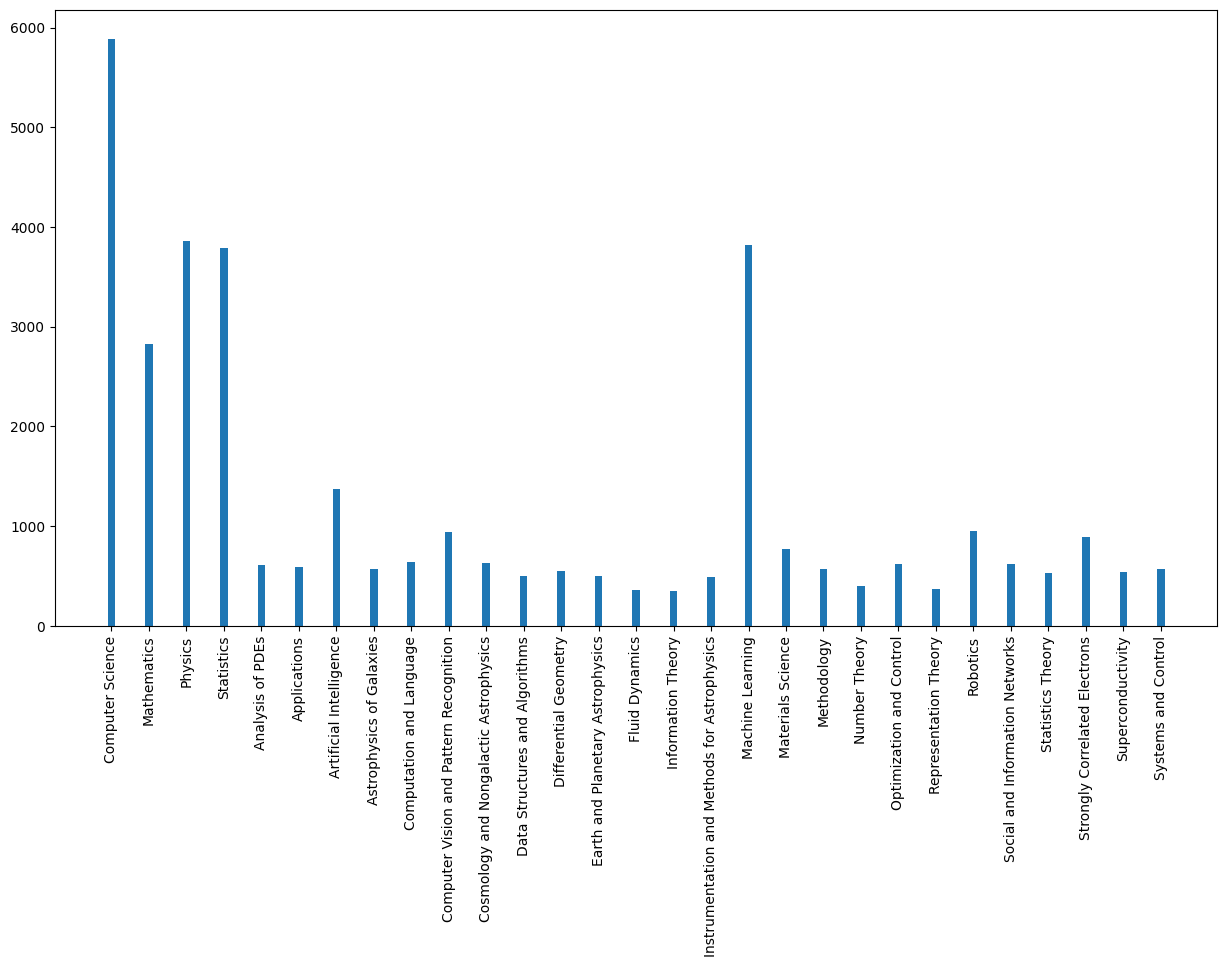

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))  # width:20, height:3
plt.bar(tags_count_dict.keys(), tags_count_dict.values(), align='center', width=0.2)
plt.xticks(rotation=90)
plt.show()

### Step 8: WordCloud Analysis for some topic

In [16]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS)), random_state = 42)

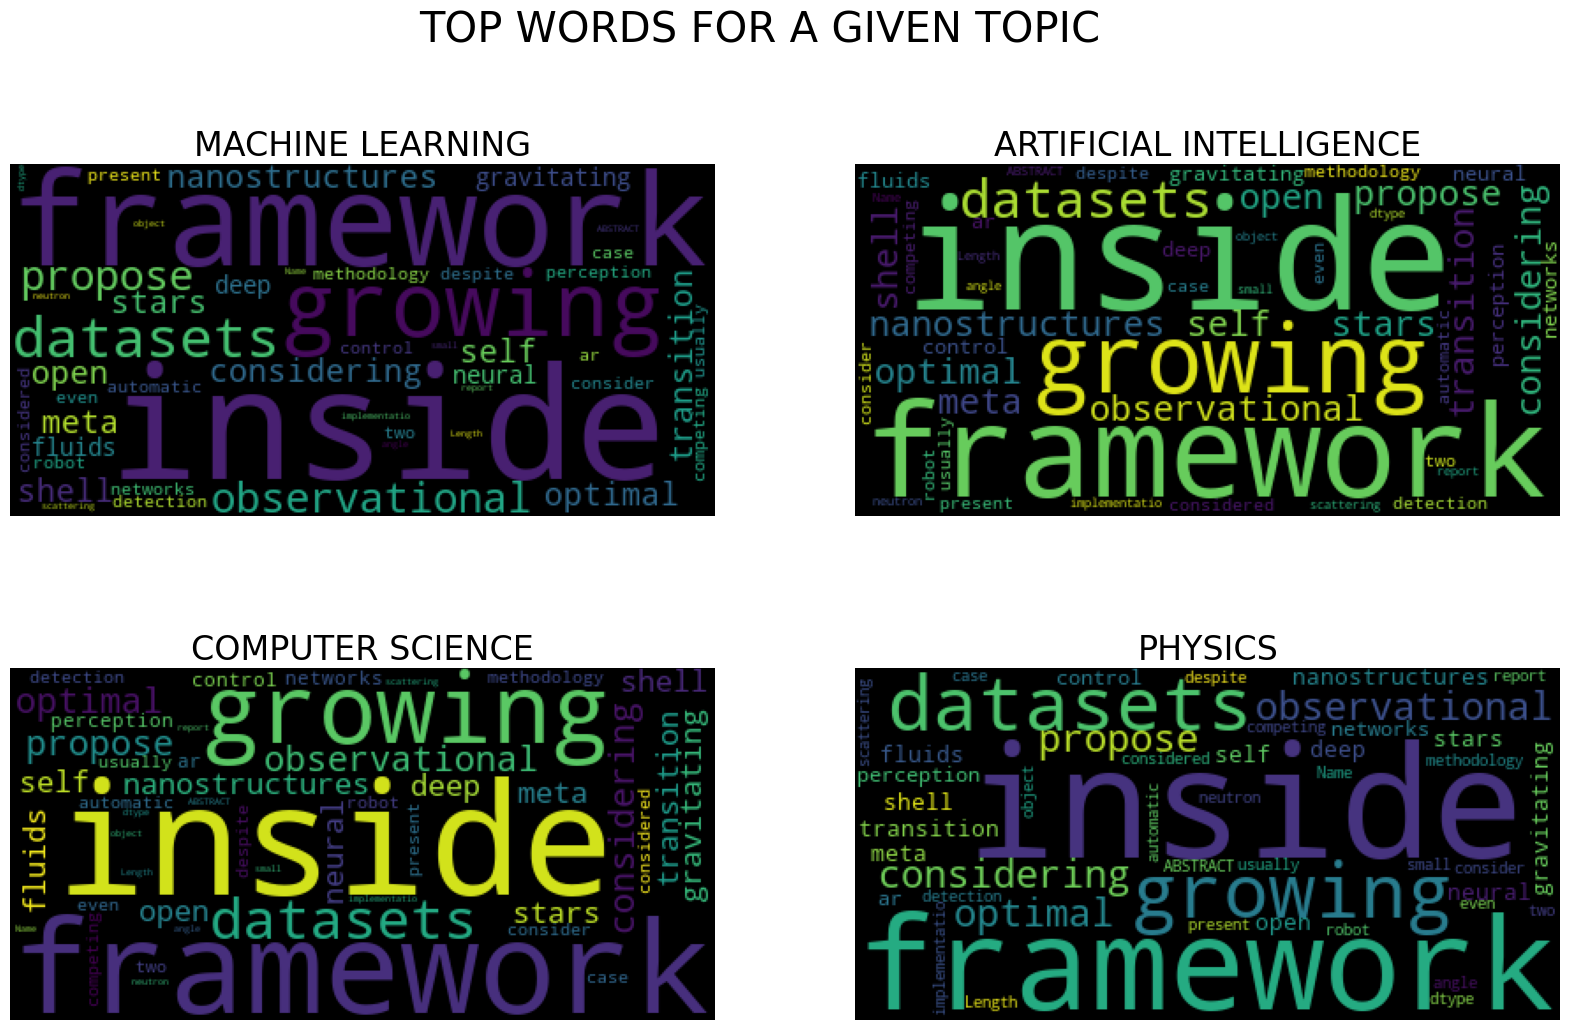

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(['Machine Learning', 'Artificial Intelligence', 'Computer Science', 'Physics']):
  op = wc.generate(str(df['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

### Step 9: Analyse the Text closely!

In [18]:
df['ABSTRACT'][100]

'the lack of understanding of human biology creates the hurdle considering a development of precision medicines. to overcome this hurdle we need to better understand a potential synergy between the given investigational treatment (vs. placebo or active control) and various demographic or genetic factors, disease history and severity, etc., with a goal of identifying those patients at increased risk of exhibiting clinically meaningful treatment benefit. considering this reason, we propose a vg method, which combines a idea of an individual treatment effect (ite) from virtual twins (foster, et al., 2011) with a unbiased variable selection and cutoff value determination algorithm from guide (loh, et al., 2015). simulation results show a vg method has less variable selection bias than virtual twins and higher statistical power than guide interaction inside a presence of prognostic variables with strong treatment effects. type i error and predictive performance of virtual twins, guide and v

# Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

# Pre-Processing

### Step 1: Case Folding (convert all words to lower case)

### Step 2: Stop-Word Removal

In [20]:
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for case-folding
class CaseFoldingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(lambda x: x.lower())

# Custom transformer for stop words removal
class StopWordsRemovalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        stop_words_list = stopwords.words('english')
        return X.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words_list]))

# Define the preprocessing steps
preprocessing_steps = [
    ('case_folding', CaseFoldingTransformer()),
    ('stop_words_removal', StopWordsRemovalTransformer())
]


### Step 3: Bag of Words

In [21]:
# Bag-of-words can be implemented using "CountVectorizer" in sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Create the pipeline

In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessing', Pipeline(steps=preprocessing_steps)),
    ('vectorizer', CountVectorizer(max_features=10000))
])

# Fit the pipeline on the training data

In [23]:
X_train_bow = pipeline.fit_transform(X_train)
X_test_bow = pipeline.transform(X_test)

# Model training

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train_bow, y_train)

RandomForestClassifier()

# Prediction

In [25]:
y_pred = clf.predict(X_test_bow)

In [26]:
y_pred

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Evaluation

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1192
           1       0.95      0.57      0.72       560
           2       0.99      0.87      0.93       769
           3       0.82      0.51      0.63       785
           4       0.95      0.16      0.28       122
           5       0.00      0.00      0.00       114
           6       0.00      0.00      0.00       286
           7       0.90      0.30      0.45       118
           8       0.00      0.00      0.00       125
           9       0.80      0.02      0.04       192
          10       0.83      0.12      0.21       127
          11       1.00      0.04      0.08        93
          12       0.95      0.34      0.50       109
          13       1.00      0.17      0.29       101
          14       0.00      0.00      0.00        68
          15       0.00      0.00      0.00        68
          16       0.00      0.00      0.00        93
          17       0.79    

C:\Users\kiran\Desktop\ML-Implemented-Mailing-Service\HackSharks\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kiran\Desktop\ML-Implemented-Mailing-Service\HackSharks\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
